In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

In [2]:
dir(stats)

['F_onewayBadInputSizesWarning',
 'F_onewayConstantInputWarning',
 'PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'SpearmanRConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_ksstats',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 '_wilcoxon_data',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_c

In [3]:
df = pd.read_csv('stats_ranking.csv')

In [4]:
df.head()

,Student,Score,Student.1,Score.1
0,1,96,1,69
1,2,96,2,63
2,3,97,3,68
3,4,94,4,75
4,5,83,5,81


In [5]:
df=df.drop(columns=['Student.1'])
df.columns=[['Student','Math', 'Science']]

In [6]:
df

,Student,Math,Science
0,1,96,69
1,2,96,63
2,3,97,68
3,4,94,75
4,5,83,81
5,6,82,55
6,7,85,85
7,8,90,58
8,9,91,64
9,10,90,77


In [7]:
df.describe()

,Student,Math,Science
count,10.00000,10.000000,10.000000
mean,5.50000,90.400000,69.500000
std,3.02765,5.521674,9.868581
min,1.00000,82.000000,55.000000
25%,3.25000,86.250000,63.250000
50%,5.50000,90.500000,68.500000
75%,7.75000,95.500000,76.500000
max,10.00000,97.000000,85.000000


Lets say A new student scored 92 in Math and 79 in Science and we want to calculate whats his percentile as compared to the class's scores

In [8]:
df.values[:,1] #consider only Math scores

array([96, 96, 97, 94, 83, 82, 85, 90, 91, 90])

In [9]:
score = np.array([92])
stats.percentileofscore(df.values[:,1], score)

60.0

In [10]:
df.values[:,2]

array([69, 63, 68, 75, 81, 55, 85, 58, 64, 77])

In [11]:
score = np.array([79])
stats.percentileofscore(df.values[:,2], score)

80.0

We shall plot  the scores and understand the percentile scores we have obtained

(array([2., 0., 1., 0., 0., 2., 1., 0., 1., 3.]),
 array([82. , 83.5, 85. , 86.5, 88. , 89.5, 91. , 92.5, 94. , 95.5, 97. ]),
 <BarContainer object of 10 artists>)

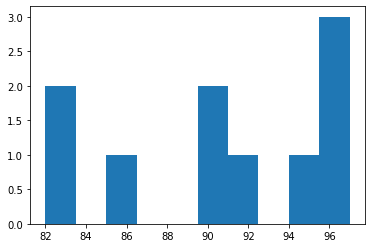

In [12]:
plt.hist(df[['Math']])

In [13]:
df[['Math']].describe()

,Math
count,10.000000
mean,90.400000
std,5.521674
min,82.000000
25%,86.250000
50%,90.500000
75%,95.500000
max,97.000000


from the percentile values, 75% percentile is at 95.5 score,
For the student who scored 92, 60% percentile value seems to be correct. lets calculate

In [30]:
for score in range(80,101):
    print(f'for score: {score} \t percentile: ', stats.percentileofscore(df[['Math']],score))

for score: 80 	 percentile:  0.0
for score: 81 	 percentile:  0.0
for score: 82 	 percentile:  10.0
for score: 83 	 percentile:  20.0
for score: 84 	 percentile:  20.0
for score: 85 	 percentile:  30.0
for score: 86 	 percentile:  30.0
for score: 87 	 percentile:  30.0
for score: 88 	 percentile:  30.0
for score: 89 	 percentile:  30.0
for score: 90 	 percentile:  45.0
for score: 91 	 percentile:  60.0
for score: 92 	 percentile:  60.0
for score: 93 	 percentile:  60.0
for score: 94 	 percentile:  70.0
for score: 95 	 percentile:  70.0
for score: 96 	 percentile:  85.0
for score: 97 	 percentile:  100.0
for score: 98 	 percentile:  100.0
for score: 99 	 percentile:  100.0
for score: 100 	 percentile:  100.0


As we can see for a student scoring 92 in Maths, 60% of students have scores lesser than him/her

For same student who scored 79 in science, 

In [31]:
for score in range(50,101):# we can pass range as min and max values
    print(f'for score: {score} \t percentile: ', stats.percentileofscore(df[['Science']],score))

for score: 50 	 percentile:  0.0
for score: 51 	 percentile:  0.0
for score: 52 	 percentile:  0.0
for score: 53 	 percentile:  0.0
for score: 54 	 percentile:  0.0
for score: 55 	 percentile:  10.0
for score: 56 	 percentile:  10.0
for score: 57 	 percentile:  10.0
for score: 58 	 percentile:  20.0
for score: 59 	 percentile:  20.0
for score: 60 	 percentile:  20.0
for score: 61 	 percentile:  20.0
for score: 62 	 percentile:  20.0
for score: 63 	 percentile:  30.0
for score: 64 	 percentile:  40.0
for score: 65 	 percentile:  40.0
for score: 66 	 percentile:  40.0
for score: 67 	 percentile:  40.0
for score: 68 	 percentile:  50.0
for score: 69 	 percentile:  60.0
for score: 70 	 percentile:  60.0
for score: 71 	 percentile:  60.0
for score: 72 	 percentile:  60.0
for score: 73 	 percentile:  60.0
for score: 74 	 percentile:  60.0
for score: 75 	 percentile:  70.0
for score: 76 	 percentile:  70.0
for score: 77 	 percentile:  80.0
for score: 78 	 percentile:  80.0
for score: 79 	 per

This means 80% of the students have scored lesser than the student who scored 79 in science as compared to 60% of students scored less in Math than the same student who scored 92.

A percentileofscore of, for example, 80% means that 80% of the scores in a are below the given score. In the case of gaps or ties, the exact definition depends on the optional keyword, kind.

Parameters

    aarray_like

        Array of scores to which score is compared.
    scoreint or float

        Score that is compared to the elements in a.
    kind{‘rank’, ‘weak’, ‘strict’, ‘mean’}, optional

        Specifies the interpretation of the resulting score. The following options are available (default is ‘rank’):

                ‘rank’: Average percentage ranking of score. In case of multiple matches, average the percentage rankings of all matching scores.

                ‘weak’: This kind corresponds to the definition of a cumulative distribution function. A percentileofscore of 80% means that 80% of values are less than or equal to the provided score.

                ‘strict’: Similar to “weak”, except that only values that are strictly less than the given score are counted.

                ‘mean’: The average of the “weak” and “strict” scores, often used in testing. See https://en.wikipedia.org/wiki/Percentile_rank



In [ ]:
As we can see 